In [42]:
%matplotlib inline
import numpy as np
import scipy.constants as const 
phi_golden =const.golden_ratio
from scipy.optimize import minimize
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib

In [43]:
font = {'size'   : 18, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [5.0*phi_golden,5.0]
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'

## Input parameters (TODO)

In [6]:
cmb_temperature = 2.7255
hubble_const = 0.67810
o_b = 0.02238280
o_cdm = 0.1201075

## Evolutions of energy densities 

### Getting energy density manually

\begin{equation}
    \rho_i = \Omega_{i,0}H_0^2a^{-3(1+w_i)}
\end{equation}

### Using CLASS

In [62]:
from classy import Class
cosmo = Class()

common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':1 # comment this line in if you want to view the thermal history.
                   }  

cosmo = Class()
cosmo.set(common_settings)
cosmo.compute()
derived = cosmo.get_current_derived_parameters(['tau_rec','z_rec'])
thermo = cosmo.get_thermodynamics()
print (thermo.keys())

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775217
    corresponding to conformal time = 280.650008 Mpc
    with comoving sound horizon = 144.510135 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.129004
    giving an angle 100*theta_* = 1.044144
 -> baryon drag stops at z = 1059.921816
    corresponding to conformal time = 286.316115 Mpc
    with comoving sound horizon rs = 147.071381 Mpc
 -> reionization at z = 7.671463
    corresponding to conformal time = 5127.427816 Mpc
dict_keys(['scale factor a', 'z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])


In [73]:
a = thermo['scale factor a']
z = thermo['z']
z_reio = cosmo.z_reio()
z_rec = derived['z_rec']
tau_rec = derived['tau_rec']
tau = thermo['conf. time [Mpc]']
x_e = thermo['x_e']
dkappa = thermo["kappa' [Mpc^-1]"]
g = thermo['g [Mpc^-1]']
# to make the reionisation peak visible, rescale g by 100 for late times
# g[:500] *= 100


In [19]:
gz = interp1d(z,-g)

In [26]:
minimize(gz,1100.)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.021248976258130065
        x: [ 1.089e+03]
      nit: 2
      jac: [ 2.369e-06]
 hess_inv: [[ 3.247e+05]]
     nfev: 22
     njev: 11

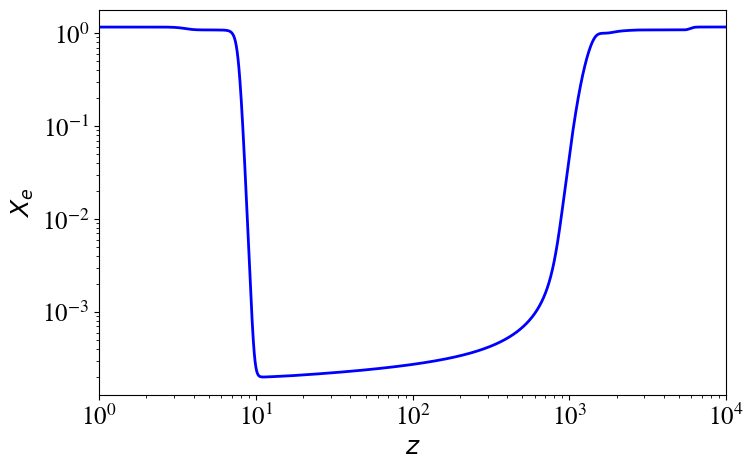

In [45]:

plt.loglog(z, x_e,'b',lw=2)
plt.xlim(1,1e4)
plt.xlabel(r'$z$')
plt.ylabel(r'$X_e$')
plt.savefig('X_e-z.pdf')

In [60]:
cosmo.get_current_derived_parameters(['z_rec'])

{'z_rec': 1088.7752174018995}

In [72]:
cosmo.z_reio()

7.6714630126953125

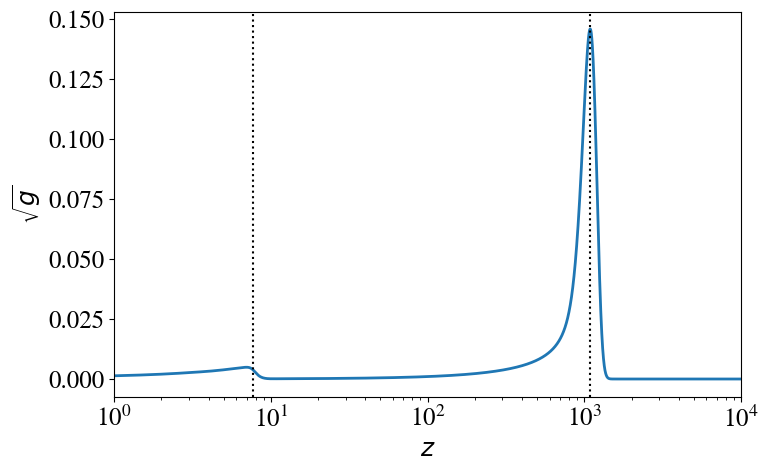

In [74]:
plt.semilogx(z,np.sqrt(g),lw=2)
plt.xlim(1,1e4)
plt.xlabel(r'$z$')
plt.ylabel(r'$\sqrt{g}$')
plt.axvline(x=z_rec, color='k',ls=':')
plt.axvline(x=z_reio, color='k',ls=':')
plt.savefig('visibility_g.pdf')

In [ ]:
# Plotting
    
# plt.xlim([1.e2,derived['conformal_age']])
plt.xlabel(r'$\tau \,\,\, \mathrm{[Mpc]}$')
plt.ylabel(r'$\mathrm{visibility} \,\,\, g \,\,\, [\mathrm{Mpc}^{-1}]$')
plt.axvline(x=derived['tau_rec'],color='k')
# The conformal time at reionisation  could be extracted from the code.
# But we know it because it is part of the standard output
# when thermodynamics_verbose=1
plt.axvline(x=4255.316282,color='k')
#
# Print functions one by one, saving between each (for slides)
#
plt.semilogx(tau,g,label=r'$\psi$')
plt.show()